In [7]:
import h5py
import os

fpath = '~/Data_local/datasets/pinky/ground_truth/stitched_vol19-vol34/crop_x1024_y1024_z100/img.h5'
fpath = os.path.expanduser(fpath)

with h5py.File(fpath, 'r') as f:
    data = f['main'][...].astype('float32')
    data /= 255.0

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def random_patch(w=256):
    z = np.random.randint(0, data.shape[-3])
    y = np.random.randint(0, data.shape[-2] - w)
    x = np.random.randint(0, data.shape[-1] - w)
    return np.copy(data[z,y:y+w,x:x+w])

In [10]:
import numpy as np
import augmentor
from augmentor.perturb import *

In [22]:
def generate_stencil(m=20, w=256, w2=120, b1=10, b2=10, b3=3, thresh=0.5):
    fig = plt.figure(figsize=(10,90))

    grad = np.zeros((w,w2)).astype('float32')
    grad[:,m:-m] = 1
    Blur(b1)(grad)
    plt.subplot(1,9,1)
    plt.imshow(grad, cmap='gray')

#     stencil = np.random.rand(w,w2).astype('float32')
    stencil = np.random.normal(0,1,(w,w2)).astype('float32')
    plt.subplot(1,9,2)
    plt.imshow(stencil, cmap='gray')

    Blur(b2)(stencil)
    plt.subplot(1,9,3)
    plt.imshow(stencil, cmap='gray')

    stencil = (stencil > thresh).astype(stencil.dtype)
    plt.subplot(1,9,4)
    plt.imshow(stencil, cmap='gray')

    stencil *= grad
    plt.subplot(1,9,5)
    plt.imshow(stencil, cmap='gray')

    Blur(b3)(stencil)
    plt.subplot(1,9,6)
    plt.imshow(stencil, cmap='gray')

    plt.show()
    
    return stencil

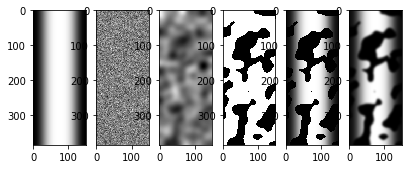

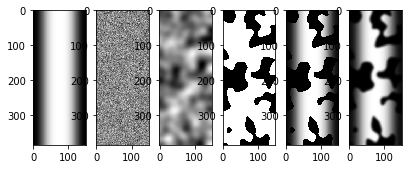

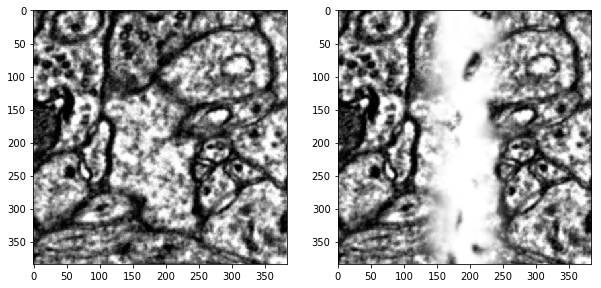

In [42]:
w = 384
w2 = 150
margin = 30
thresh = -0.01
b1 = 15

sten1 = generate_stencil(m=margin, b1=b1, w=w, w2=w2, thresh=thresh)
sten2 = generate_stencil(m=margin, b1=b1, w=w, w2=w2, thresh=thresh)

img = random_patch(w=w)

fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

img = img.astype(sten1.dtype)

a = (w - w2) // 2
b = a + w2
img[:,a:b] *= (1-sten2)
img[:,a:b] += sten2
img[:,a:b] *= (1-sten1)
img[:,a:b] += sten1

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')

plt.show()